In [34]:
import torch

In [35]:
torch.cuda.empty_cache()
print("done")

done


In [6]:
import arcgis.learn

In [2]:
import arcgis

In [23]:
cd

C:\Users\pand8760


##### import arcpy  
from arcpy.ia import *

In [17]:
from arcgis.learn import prepare_data, MultiTaskRoadExtractor, UnetClassifier,PSPNetClassifier

In [4]:
import os, zipfile
from pathlib import Path
from arcgis.gis import GIS

In [7]:
gis = GIS(username="pand8760", password="Vadapav@1033")

<Item title:"automatic_road_extraction_using_deep_learning" type:Image Collection owner:api_data_owner>
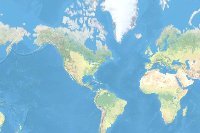

In [6]:
#training_data = gis.content.get('b7bbf2f5f4184960890afeabbdb51a32')
#training_data
#Download using the link below and use, do not use the download function from filepath.

In [7]:
#filepath = r"c:\Users\pand8760\Downloads\automatic_road_extraction_using_deep_learning.zip"

In [8]:
#with zipfile.ZipFile(filepath, 'r') as zip_ref:
    zip_ref.extractall(Path(filepath).parent)

In [18]:
#output_path = Path(os.path.join(os.path.splitext(filepath)[0]))
output_path = "C:\\Users\\pand8760\\Downloads\\auto_road_extraction"

In [19]:
data = prepare_data(output_path, chip_size=512, batch_size=4)

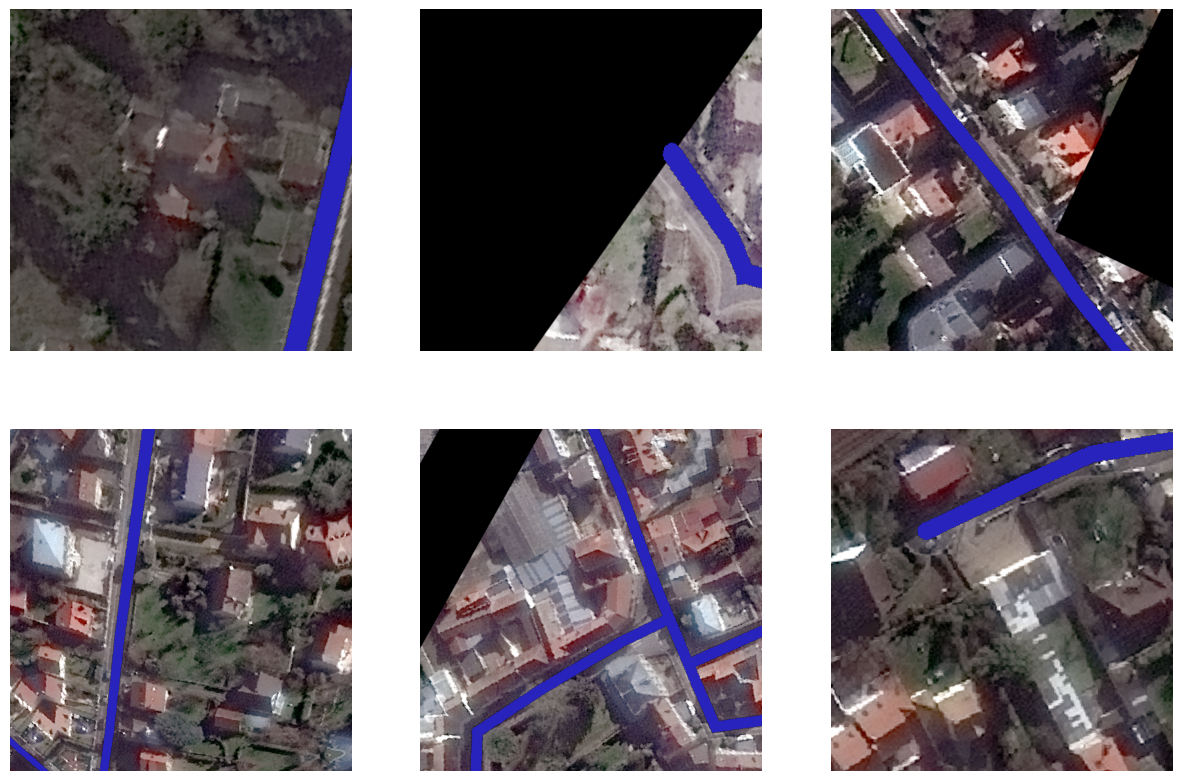

In [8]:
data.show_batch(alpha=1)

In [21]:
model = MultiTaskRoadExtractor(data, mtl_model="linknet")

In [20]:
?MultiTaskRoadExtractor

Init signature:
MultiTaskRoadExtractor(
    data,
    backbone=None,
    pretrained_path=None,
    *args,
    **kwargs,
)
Docstring:     
Creates a Multi-Task Learning model for binary segmentation of roads. Supports RGB
and Multispectral Imagery.
Implementation based on https://doi.org/10.1109/CVPR.2019.01063 .

=====================   =====================================================
**Parameter**            **Description**
---------------------   -----------------------------------------------------
data                    Required fastai Databunch. Returned data object from
                        :meth:`~arcgis.learn.prepare_data`  function.
---------------------   -----------------------------------------------------
backbone                Optional String. Backbone convolutional neural network
                        model used for feature extraction. If hourglass is chosen as
                        the mtl_model (Architecture), then this parameter is
                      

In [12]:
#model.lr_find() Don't need to do this as the optimal learning rate is found on it's own  

In [22]:
model.fit(20, lr=None , early_stopping=True)

epoch     train_loss  valid_loss  accuracy  miou      dice      time    
0         2.850909    2.397763    0.941455  0.470756  0.000110  03:06     
1         1.044613    0.376244    0.941506  0.470753  0.000000  03:06     
2         0.370810    0.221595    0.942278  0.479570  0.033532  03:07     
3         0.208559    0.172898    0.982061  0.851893  0.792823  03:02     
4         0.147311    0.130639    0.988403  0.898561  0.868764  03:00     
5         0.123762    0.129277    0.988506  0.901982  0.860464  03:00     
6         0.106002    0.095360    0.994215  0.948165  0.925819  03:01     
7         0.088438    0.087086    0.994277  0.948447  0.946276  03:01     
8         0.079486    0.073977    0.995552  0.959956  0.957234  02:59     
9         0.067544    0.067087    0.996000  0.964055  0.949366  03:00     
10        0.058982    0.059835    0.996101  0.964115  0.960320  03:00     
11        0.052908    0.056014    0.996491  0.969454  0.969609  03:14     
12        0.048064    0.051

In [24]:
model.save('road_model_for_spacenet_data')

Computing model metrics...


WindowsPath('C:/Users/pand8760/Downloads/auto_road_extraction/models/road_model_for_spacenet_data')

In [13]:
data.classes

['NoData', 1]

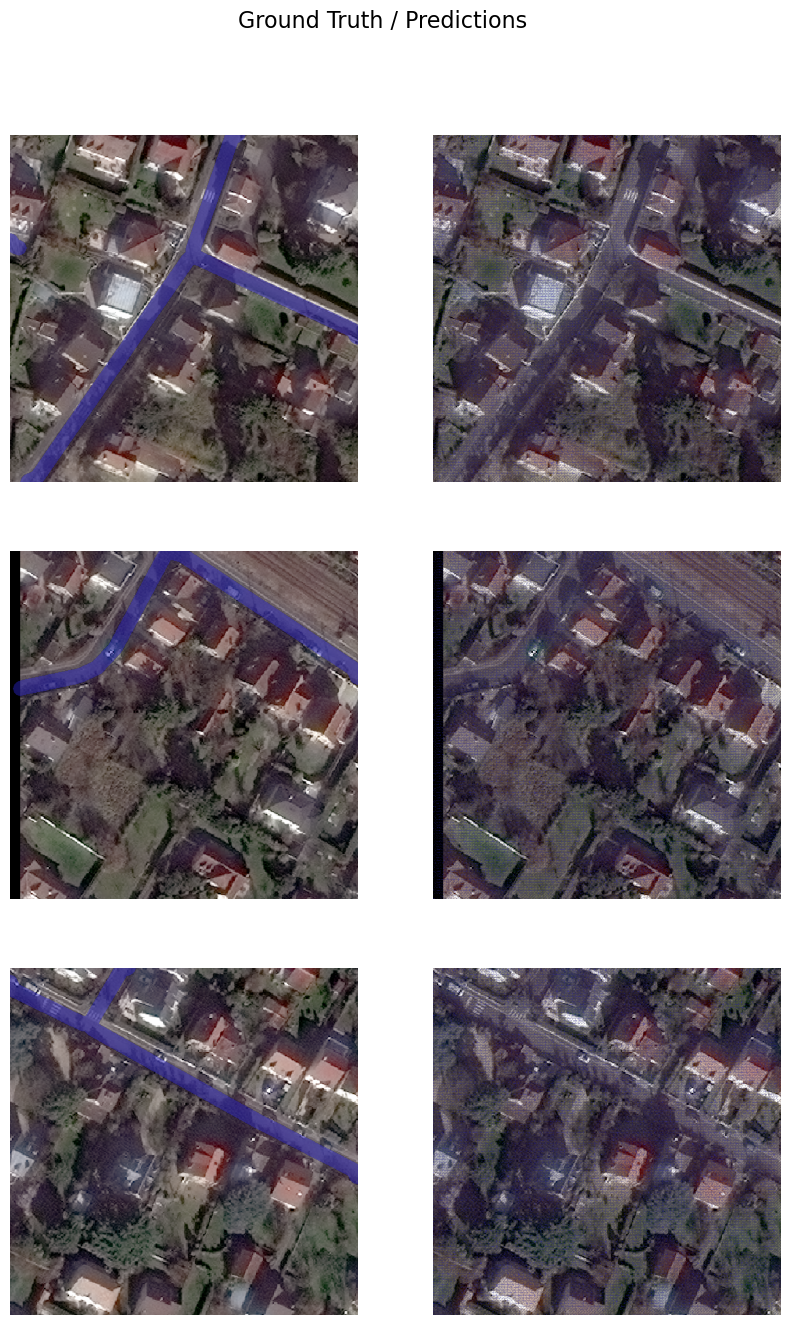

In [11]:
model.show_results(rows=3)

In [31]:
mode_resnet18 = UnetClassifier(data, backbone="resnet18")

In [1]:
mode_resnet18.lr_find()

NameError: name 'mode_resnet34' is not defined

In [38]:
mode_resnet18.fit(25, lr=None , early_stopping=True)

epoch     train_loss  valid_loss  accuracy  dice      time    
0         0.144983    0.131314    0.958729  0.015671  02:15     
Encountered error in saving checkpoint.


KeyError: 1

In [29]:
mode_resnet18.save("model_resnet18")

NameError: name 'mode_resnet18' is not defined

In [16]:
?backbone

Object `backbone` not found.


In [27]:
model_vgg = UnetClassifier(data, backbone="timm:vgg11_bn")

In [30]:
model_vgg.fit(10, lr=None , early_stopping=True)

epoch     train_loss  valid_loss  accuracy  dice      time    
0         0.132542    0.141054    0.958394  0.015067  04:35     
Encountered error in saving checkpoint.


KeyError: 1

In [4]:
model_dense = UnetClassifier(data, backbone="timm:tf_mobilenetv3_small_100")

In [6]:
model_dense.fit(25, lr=None , early_stopping=True)

epoch     train_loss  valid_loss  accuracy  dice      time    
0         0.128661    0.111821    0.959870  0.123916  02:07     
1         0.125751    0.111555    0.960035  0.159496  01:57     
2         0.132653    0.118865    0.959526  0.063210  01:57     
3         0.131290    0.121081    0.958707  0.009108  01:58     
4         0.129464    0.109048    0.959078  0.029793  01:57     
5         0.132172    0.110152    0.961587  0.215836  01:57     
6         0.122377    0.105840    0.961847  0.226555  01:57     
7         0.129205    0.110802    0.960473  0.111587  02:09     
8         0.127178    0.113576    0.961114  0.138755  02:01     
9         0.122567    0.104087    0.962165  0.248630  01:58     
10        0.127322    0.102038    0.962404  0.258928  01:57     
11        0.118690    0.102909    0.962681  0.249165  01:58     
12        0.120154    0.103838    0.958977  0.016232  01:58     
13        0.114867    0.096846    0.963105  0.240513  01:57     
14        0.118553    0.094

In [26]:
model_dense.save("mobilenetv3_model")

Computing model metrics...


WindowsPath('C:/Users/pand8760/Downloads/auto_road_extraction/models/mobilenetv3_model')

In [10]:
?PSPNetClassifier

Init signature:
PSPNetClassifier(
    data,
    backbone=None,
    use_unet=True,
    pyramid_sizes=[1, 2, 3, 6],
    pretrained_path=None,
    unet_aux_loss=False,
    pointrend=False,
    *args,
    **kwargs,
)
Docstring:     
Model architecture from https://arxiv.org/abs/1612.01105.
Creates a PSPNet Image Segmentation/ Pixel Classification model.

=====================   ===========================================
**Parameter**            **Description**
---------------------   -------------------------------------------
data                    Required fastai Databunch. Returned data object from
                        :meth:`~arcgis.learn.prepare_data` function.
---------------------   -------------------------------------------
backbone                Optional string. Backbone convolutional neural network
                        model used for feature extraction, which
---Return to continue, q to quit---                                                            is `resnet50` by 

In [14]:
psp_resnet = PSPNetClassifier(data, backbone="resnet50",pointrend="True")

In [15]:
psp_resnet.fit(25, lr=None , early_stopping=True)

epoch     train_loss  valid_loss  accuracy  dice      time    
0         0.989857    0.177908    0.958600  0.000000  01:26     
1         0.624582    0.130773    0.958600  0.000000  01:33     
2         0.528139    0.103610    0.958600  0.000000  01:23     
3         0.474534    0.148246    0.956779  0.277209  01:23     
4         0.473160    0.096633    0.962135  0.312811  01:23     
5         0.477962    0.095671    0.965231  0.344035  01:25     
6         0.456708    0.090644    0.963027  0.370412  01:23     
7         0.425962    0.097497    0.965233  0.376399  01:25     
8         0.419422    0.085215    0.964041  0.399476  01:24     
9         0.432478    0.091037    0.966185  0.356734  01:23     
10        0.407920    0.083948    0.966607  0.426079  01:23     
11        0.426165    0.082556    0.968742  0.467096  01:32     
12        0.404269    0.075798    0.968130  0.502568  01:28     
13        0.414467    0.080287    0.968498  0.408928  01:23     
14        0.417280    0.073

In [25]:
psp_resnet.save("psp_net_model")

Computing model metrics...


WindowsPath('C:/Users/pand8760/Downloads/auto_road_extraction/models/psp_net_model')